Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into "fire" (138 classes) and "not fire" (106 classes) classes.


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely "fire" and "not fire".

In [1]:
# Google Search:
# when do we use scaling in dataset in machine learning
# how to handle multicollinearity in machine learning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)
# pd.pandas.set_option("display.max_rows", None)

## *Organizing the DataSet*

***The dataset included information about two regions of the Algerian Forest, namely - "Bejaia Region" & "Sidi-Bel Abbes Region". For both the regions we have data ranging from 1st-June-2012 to 30th-September-2012. So what I have done is that I've properly classified both the regions for the given dates in 'forest_df' by adding a new 'Region' column to it.***<br><br>*We have  -  'Classes' as the O/P or Response variable, and<br>["Date", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"] as the i/p features, i.e. 11 features*

In [4]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv').reset_index()

df.rename(columns=df.iloc[0,:], inplace=True)

df = df.drop(index=0, axis=0).reset_index(drop=True)

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
# df.iloc[0:122, :]
# Bejaia Region

# df.iloc[122:246, :]
# Sidi-Bel Abbes Region

In [6]:
forest_df = df.copy()

forest_df = forest_df.drop(index=[122, 123], axis=0).reset_index(drop=True)

forest_df.shape

# [0 to 121] = Bejaia Region
# [122 to 243] = Sidi-Bel Abbes Region

(244, 14)

In [7]:
region = []
for i in range(244):
    if i<122:
        region.append("Bejaia Region")
    else:
        region.append("Sidi-Bel Abbes Region")

In [8]:
forest_df['Region'] = region

In [9]:
forest_df.Region.unique()

array(['Bejaia Region', 'Sidi-Bel Abbes Region'], dtype=object)

In [10]:
forest_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia Region
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia Region
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes Region
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes Region
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes Region
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes Region


In [11]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


### *Removing the initial spaces in column names and column values*

In [12]:
# forest_df.rename(columns={" RH":"RH", " Ws": "Ws"}, inplace=True)
forest_df.columns = forest_df.columns.str.replace(' ', '')

forest_df['Classes'] = forest_df['Classes'].apply(lambda x: 'Fire' if x=='fire   ' else 'Not-Fire')

In [13]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


### *Converting all the attributes to 'int' or 'float' except 'Classes' & 'Region'*
https://stackoverflow.com/questions/15891038/change-column-type-in-pandas#:~:text=1.-,to_numeric(),floating%2Dpoint%20numbers%20as%20appropriate.

In [14]:
# forest_df.apply(pd.to_numeric) # Error: Unable to parse string "14.6 9" at position 165

# Analyzing this Error: Unable to parse string "14.6 9" at position 165
forest_df.iloc[165]

day                               14
month                             07
year                            2012
Temperature                       37
RH                                37
Ws                                18
Rain                             0.2
FFMC                            88.9
DMC                             12.9
DC                            14.6 9
ISI                             12.5
BUI                             10.4
FWI                          fire   
Classes                     Not-Fire
Region         Sidi-Bel Abbes Region
Name: 165, dtype: object

In [15]:
forest_df['DC'] = forest_df['DC'].str.replace(' ', '')

In [16]:
forest_df.iloc[165]

day                               14
month                             07
year                            2012
Temperature                       37
RH                                37
Ws                                18
Rain                             0.2
FFMC                            88.9
DMC                             12.9
DC                             14.69
ISI                             12.5
BUI                             10.4
FWI                          fire   
Classes                     Not-Fire
Region         Sidi-Bel Abbes Region
Name: 165, dtype: object

In [17]:
forest_df = forest_df.apply(pd.to_numeric, errors = 'ignore')
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(6), int64(6), object(3)
memory usage: 28.7+ KB


### *Analyzing the column 'FWI'*

In [18]:
forest_df['FWI'].unique()
# It seems that there is a float value 'fire   ' at index = 165 (forest_df.iloc[165]), we can replace it with mean or median value

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [19]:
forest_df['FWI'].replace(to_replace='fire   ', value=None, inplace=True)

# Now converting this column to int/float
forest_df['FWI'] = pd.to_numeric(forest_df['FWI'], errors='ignore')

In [20]:
forest_df['FWI'].dtypes

dtype('float64')

In [21]:
forest_df['FWI'].iloc[165]

nan

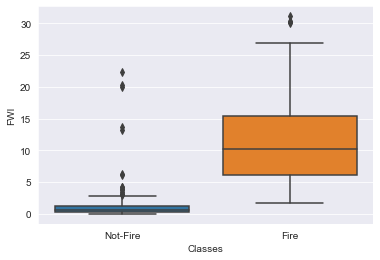

In [22]:
sns.boxplot(x=forest_df['Classes'], y=forest_df['FWI']);

In [23]:
forest_df['FWI'].mean()

7.03539094650206

In [24]:
forest_df['FWI'].median()

4.2

In [25]:
# We can replace the nan value with median
forest_df['FWI'].fillna(value=forest_df['FWI'].median(), inplace=True)

In [26]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


### *Let's analyze the features w.r.to o/p variable*

#### *Making a Date Column*
https://cmdlinetips.com/2021/02/combine-year-month-and-day-columns-to-single-date-in-pandas/#:~:text=One%20of%20the%20ways%20to,be%20combined%20into%20datetime%20column.

In [27]:
cols = ["year","month","day"]
forest_df['Date'] = forest_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
forest_df['Date']

0       2012-6-1
1       2012-6-2
2       2012-6-3
3       2012-6-4
4       2012-6-5
         ...    
239    2012-9-26
240    2012-9-27
241    2012-9-28
242    2012-9-29
243    2012-9-30
Name: Date, Length: 244, dtype: object

In [28]:
forest_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'Date'],
      dtype='object')

### *Correlation*

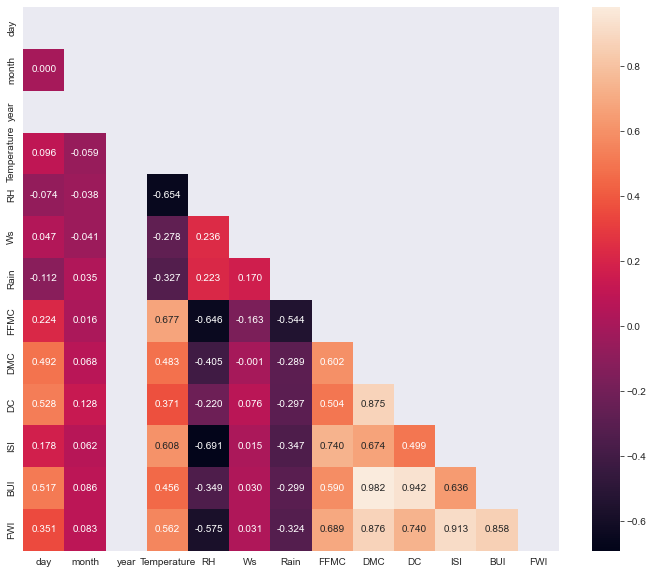

In [29]:
plt.figure(figsize=(12,10))

corr = forest_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt='.3f');

Few things we can do - 
   - We can remove the 'year' feature as it is same for all records thus add no value.
   
   - Few features are highly co-related like (FWI,FFMC),(FWI,DMC),(FWI,DC),(FWI,ISI),(FWI,BUI),(BUI,DMC),(BUI,DC),(ISI,FFMC),(DC,DMC), etc. <br> So can handle multi-collinearity.<br>**We can use Lasso Regression to deal with this.**


https://www.analyticsvidhya.com/blog/2021/03/multicollinearity-in-data-science/

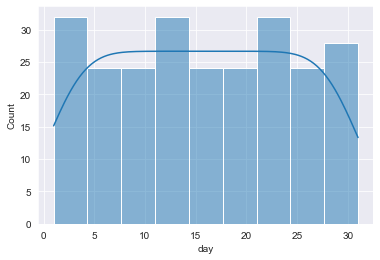

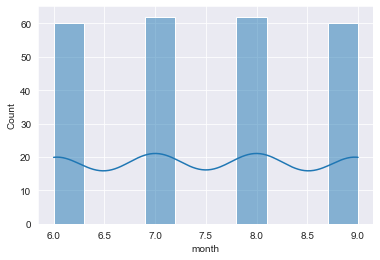

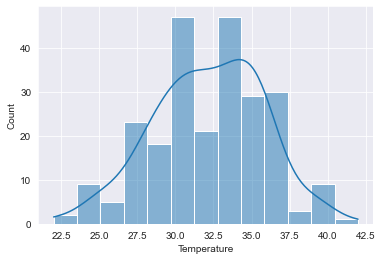

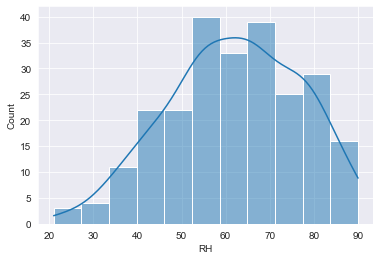

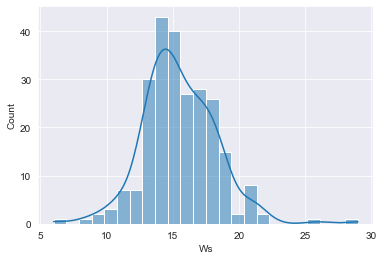

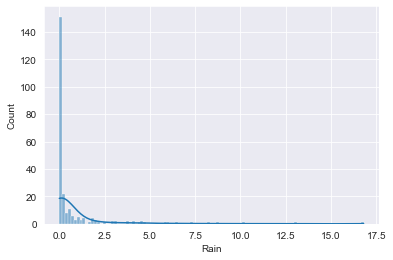

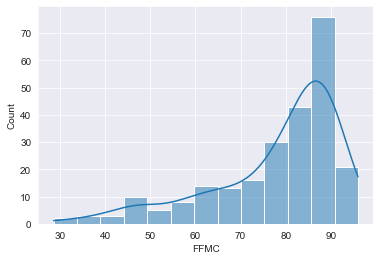

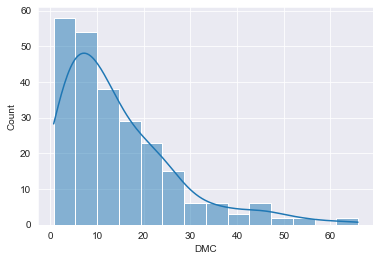

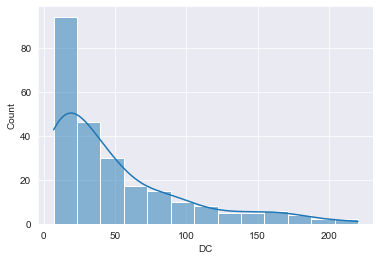

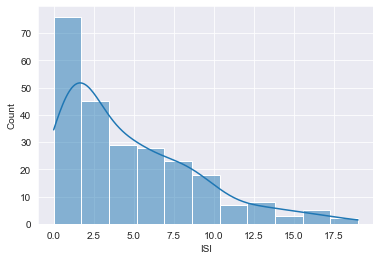

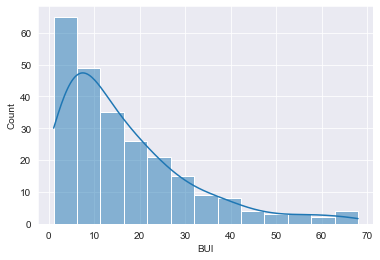

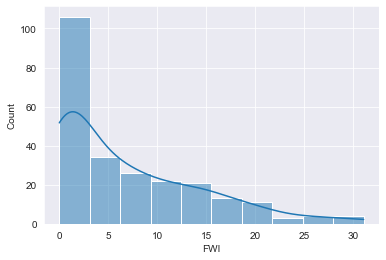

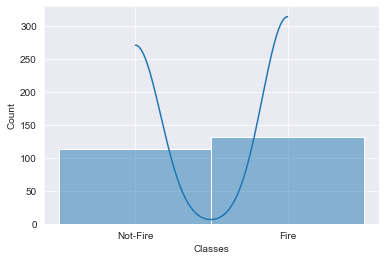

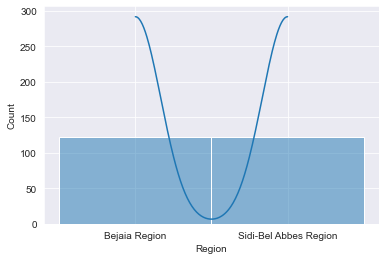

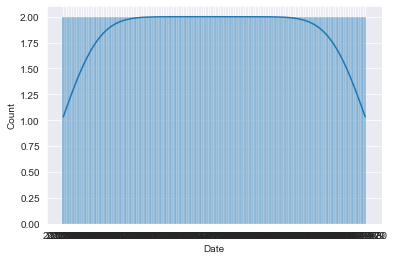

In [30]:
for i in forest_df.columns:
    if i not in ['year']:
        sns.histplot(forest_df[i], kde=True)
        plt.show()

From above curves we can see the nature of feature variables

### *Checking Outliers*

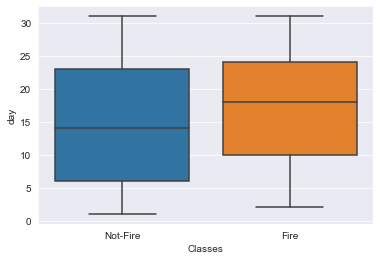

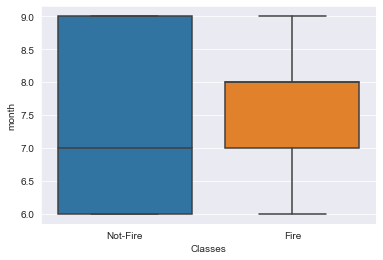

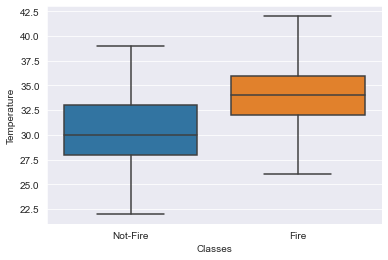

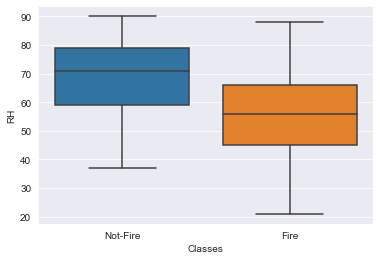

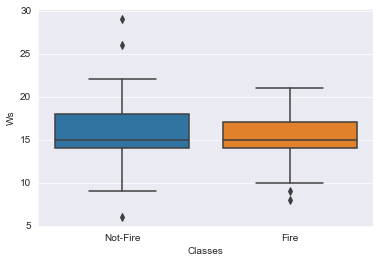

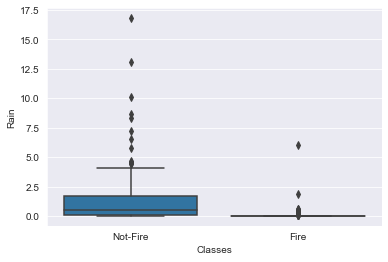

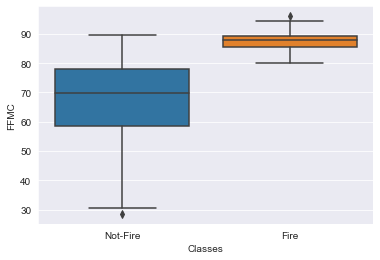

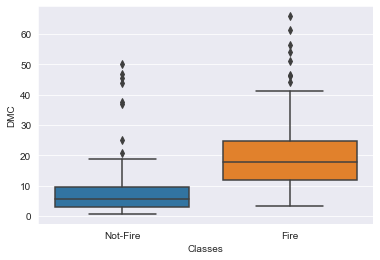

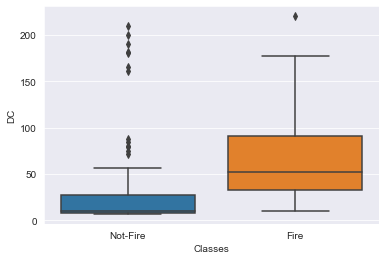

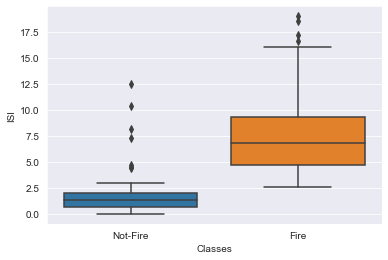

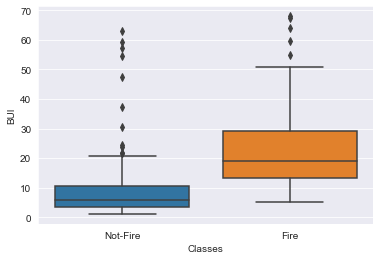

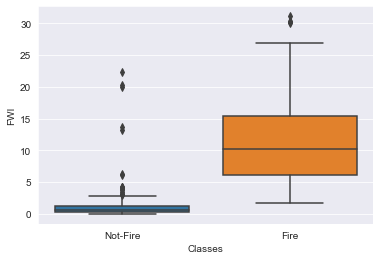

In [31]:
cols = ['day', 'month','Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

for i in cols:
    sns.boxplot(data=forest_df, x='Classes', y=i)
    plt.show()

### **['Rain', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] has lots of outliers**

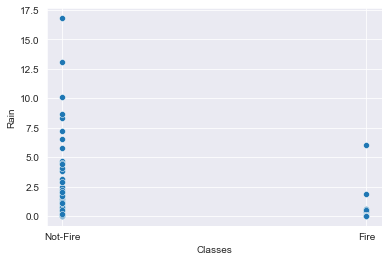

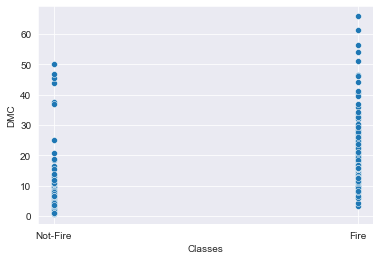

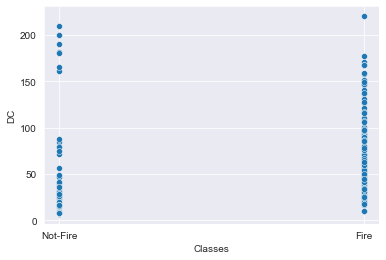

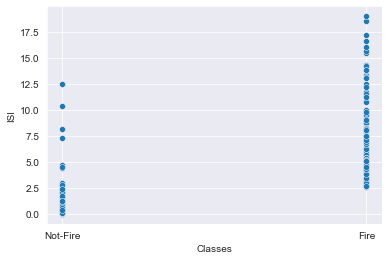

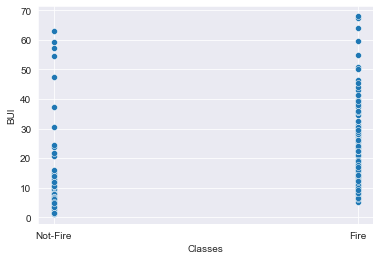

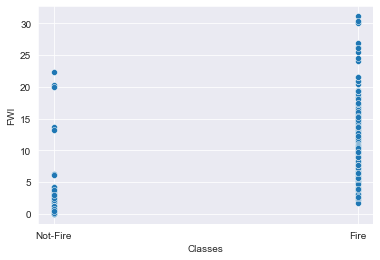

In [32]:
for i in ['Rain', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    sns.scatterplot(data=forest_df, x='Classes', y=i)
    plt.show()

### *Handling Outliers*
- https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8
- https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

Here we'll use Scaling to handle Outliers in later section

### *Preparing for Model Building*

In [33]:
forest_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'Date'],
      dtype='object')

In [34]:
X_features = ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']

X = pd.get_dummies(forest_df[X_features], drop_first=True)

In [35]:
forest_df['Classes'].unique()

array(['Not-Fire', 'Fire'], dtype=object)

In [36]:
# Encoding the target Variable

y = forest_df['Classes'].apply(lambda x: 0 if x=='Not-Fire' else 1)

In [37]:
len(X),len(y)

(244, 244)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_train.shape, y_train.shape

((170, 13), (170,))

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
X_train_scaled.shape

(170, 13)

### *Building the Classification Model*

In [42]:
# Importing the models we'll use:

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score

In [43]:
# Logistic Regression
logit_reg = LogisticRegression() # penalty='l2'
# logit_reg.fit(X_train_scaled,y_train) - does not give good accuracy
logit_reg.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = logit_reg.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[27,  3],
       [ 4, 40]], dtype=int64)

In [46]:
roc_auc_score(y_test, y_pred)

0.9045454545454545

In [47]:
# KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

roc_auc_score(y_test, y_pred)

0.8659090909090909

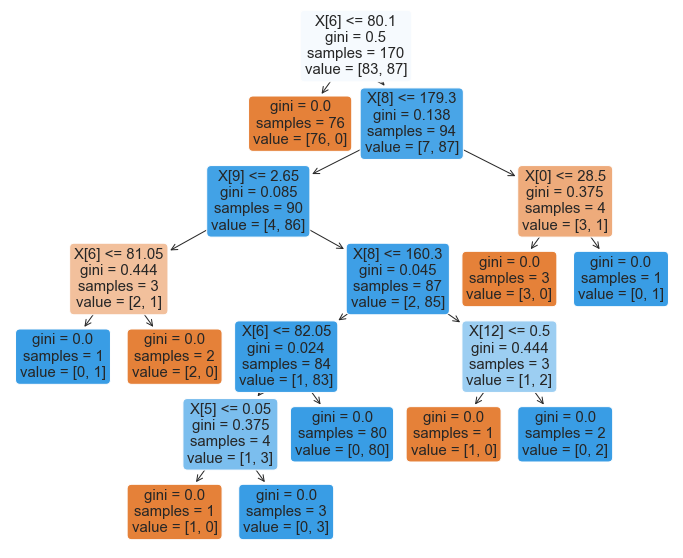

In [48]:
# DecisionTreeClassifier

from sklearn import tree

classifier = DecisionTreeClassifier(criterion='gini')  #, max_depth=1
classifier.fit(X_train, y_train)

plt.figure(figsize=(12,10))
tree.plot_tree(classifier, filled=True, rounded=True);

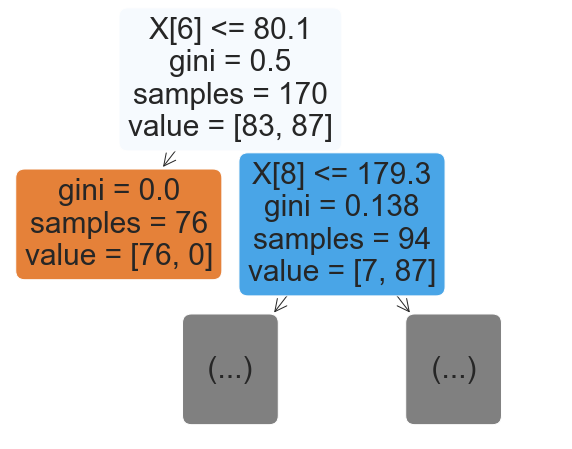

In [49]:
plt.figure(figsize=(10,8))
tree.plot_tree(classifier, filled=True, rounded=True, max_depth=1);

In [50]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=1)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

roc_auc_score(y_test, y_pred)

0.9333333333333333

In [51]:
# SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

roc_auc_score(y_test, y_pred)

0.8825757575757576

In [52]:
# Random Forest

rdm_c = RandomForestClassifier(max_depth=2)
rdm_c.fit(X_train, y_train)

y_pred = rdm_c.predict(X_test)

roc_auc_score(y_test, y_pred)

0.9386363636363636

## *From Above, we see, Random Forest is pretty Good*

## *Using pycaret*

In [85]:
from pycaret.classification import setup, compare_models

In [86]:
_ = setup(data = pd.concat([X_train, y_train], axis=1), target='Classes', fold_shuffle=True)

,Description,Value
0,session_id,5459
1,Target,Classes
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(170, 14)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [87]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9500,0.9774,0.9690,0.9458,0.9547,0.8990,0.9056,0.0130
catboost,CatBoost Classifier,0.9417,0.9887,0.9381,0.9583,0.9446,0.8833,0.8909,0.2960
dt,Decision Tree Classifier,0.9333,0.9369,0.9405,0.9464,0.9383,0.8676,0.8774,0.0050
rf,Random Forest Classifier,0.9333,0.9860,0.9524,0.9339,0.9392,0.8657,0.8741,0.0390
lightgbm,Light Gradient Boosting Machine,0.9333,0.9860,0.9381,0.9464,0.9382,0.8667,0.8750,0.0810
ada,Ada Boost Classifier,0.9250,0.9721,0.9238,0.9464,0.9292,0.8509,0.8619,0.0130
gbc,Gradient Boosting Classifier,0.9242,0.9494,0.9238,0.9440,0.9279,0.8489,0.8606,0.0120
et,Extra Trees Classifier,0.8985,0.9784,0.9214,0.9006,0.9071,0.7957,0.8036,0.0360
lr,Logistic Regression,0.8818,0.9608,0.8786,0.9119,0.8835,0.7653,0.7820,0.0160
knn,K Neighbors Classifier,0.8636,0.9523,0.9405,0.8488,0.8840,0.7210,0.7462,0.0120


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=5459, reg_alpha=0, ...)

## *Bagging Ensemble*
We can use top 5 or any number of models and apply ensemble

In [88]:
# xgboost - Extreme Gradient Boosting	
# catboost - CatBoost Classifier	
# dt - Decision Tree Classifier	
# rf - Random Forest Classifier	
# lightgbm - Light Gradient Boosting Machine

In [54]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
models = {
    "xgboost": XGBClassifier(),	
    "catboost": CatBoostClassifier(),	
    "dt": DecisionTreeClassifier(),	
    "rf": RandomForestClassifier(),
    "lightgbm": LGBMClassifier(),
    "ada": AdaBoostClassifier(),
    "gbc": GradientBoostingClassifier()
}

In [56]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " - Trained")

xgboost - Trained
Learning rate set to 0.004834
0:	learn: 0.6866170	total: 144ms	remaining: 2m 23s
1:	learn: 0.6794439	total: 145ms	remaining: 1m 12s
2:	learn: 0.6705986	total: 145ms	remaining: 48.3s
3:	learn: 0.6650108	total: 146ms	remaining: 36.4s
4:	learn: 0.6592325	total: 147ms	remaining: 29.3s
5:	learn: 0.6525494	total: 148ms	remaining: 24.5s
6:	learn: 0.6463916	total: 149ms	remaining: 21.1s
7:	learn: 0.6390492	total: 149ms	remaining: 18.5s
8:	learn: 0.6328396	total: 150ms	remaining: 16.5s
9:	learn: 0.6265173	total: 151ms	remaining: 15s
10:	learn: 0.6208012	total: 152ms	remaining: 13.7s
11:	learn: 0.6148750	total: 153ms	remaining: 12.6s
12:	learn: 0.6072672	total: 154ms	remaining: 11.7s
13:	learn: 0.5996168	total: 154ms	remaining: 10.9s
14:	learn: 0.5936343	total: 155ms	remaining: 10.2s
15:	learn: 0.5869499	total: 156ms	remaining: 9.61s
16:	learn: 0.5817642	total: 157ms	remaining: 9.09s
17:	learn: 0.5756207	total: 158ms	remaining: 8.62s
18:	learn: 0.5700221	total: 159ms	remaining:

In [57]:
from sklearn.model_selection import KFold, cross_val_score

results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    results[name] = result

Learning rate set to 0.004622
0:	learn: 0.6871013	total: 899us	remaining: 898ms
1:	learn: 0.6813672	total: 1.63ms	remaining: 815ms
2:	learn: 0.6758041	total: 2.42ms	remaining: 804ms
3:	learn: 0.6703991	total: 3.21ms	remaining: 800ms
4:	learn: 0.6652444	total: 3.98ms	remaining: 793ms
5:	learn: 0.6594734	total: 4.77ms	remaining: 791ms
6:	learn: 0.6534736	total: 5.55ms	remaining: 787ms
7:	learn: 0.6474052	total: 6.29ms	remaining: 780ms
8:	learn: 0.6408102	total: 7.06ms	remaining: 777ms
9:	learn: 0.6354993	total: 7.84ms	remaining: 777ms
10:	learn: 0.6303639	total: 8.63ms	remaining: 776ms
11:	learn: 0.6240578	total: 9.42ms	remaining: 775ms
12:	learn: 0.6179737	total: 10.2ms	remaining: 774ms
13:	learn: 0.6111469	total: 10.8ms	remaining: 760ms
14:	learn: 0.6050974	total: 11.5ms	remaining: 758ms
15:	learn: 0.6001348	total: 12.2ms	remaining: 753ms
16:	learn: 0.5954063	total: 13ms	remaining: 754ms
17:	learn: 0.5889612	total: 13.8ms	remaining: 753ms
18:	learn: 0.5832805	total: 15ms	remaining: 776

In [58]:
for name, result in results.items():
    print("----------\n" + name)
    print("Std. Deviation:",np.std(result))
    
#  It seems that our model is doing well as deviations are not that significant

----------
xgboost
Std. Deviation: 0.06859943405700353
----------
catboost
Std. Deviation: 0.057635052771368905
----------
dt
Std. Deviation: 0.0576350527713689
----------
rf
Std. Deviation: 0.06681068642117968
----------
lightgbm
Std. Deviation: 0.05549400665915649
----------
ada
Std. Deviation: 0.06859943405700353
----------
gbc
Std. Deviation: 0.07180326832784531


### *Combining Predictions*

In [59]:
final_prediction = (
    0.3*models['xgboost'].predict(X_test)+
    0.2*models['catboost'].predict(X_test)+
    0.1*models['dt'].predict(X_test)+
    0.1*models['rf'].predict(X_test)+
    0.1*models['lightgbm'].predict(X_test)+
    0.1*models['ada'].predict(X_test)+
    0.1*models['gbc'].predict(X_test))

In [60]:
roc_auc_score(y_test, final_prediction)

# A very Good Score of 96.21% on test data-set

0.9625

## *Thus our ensemle model gives the best accuracy of 96.25%*

## *Saving the train & test dataset*

In [61]:
pd.concat([X,y], axis=1).to_csv("algerian_forest_cleaned_df.csv", index=False, header=True)

### *Saving our model for deployment*

#### *Saving XGBClassifier()*

In [62]:
import pickle

pickle.dump(models['xgboost'], open('algerian_forest_model.pkl', 'wb'))

In [63]:
pickled_model = pickle.load(open('algerian_forest_model.pkl', 'rb'))

In [64]:
roc_auc_score(y_test, pickled_model.predict(X_test))

0.943939393939394

### *Single Input Prediction*

In [65]:
dict_test = {
    "day":2.500e+01, "month":6.000e+00, "Temperature":3.100e+01, 
    "RH":6.400e+01, "Ws":1.500e+01, "Rain":0.000e+00,
    "FFMC":8.670e+01, "DMC":1.420e+01, "DC":6.380e+01, "ISI":5.700e+00, 
    "BUI":1.830e+01, "FWI":8.400e+00,
    "Region_Sidi-Bel Abbes Region":0.000e+00
}

In [66]:
list(dict_test.values())

[25.0, 6.0, 31.0, 64.0, 15.0, 0.0, 86.7, 14.2, 63.8, 5.7, 18.3, 8.4, 0.0]

In [84]:
np.array([list(dict_test.values())]) # 2-d array

array([[25. ,  6. , 31. , 64. , 15. ,  0. , 86.7, 14.2, 63.8,  5.7, 18.3,
         8.4,  0. ]])

In [85]:
pickled_model.predict(np.array([list(dict_test.values())]))[0]

1

### *Bulk Prediction*

In [86]:
pickled_model.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

***